In [39]:
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
plt.clf()
plt.close('all')
plt.style.use('classic')

Simulation has been carried out using the scheme detailed in cmos.asc. In particular using $V_{DS} = 500 \textrm{ }\mathrm{mV}$.

### Method 1: Constant current method

In [40]:
# constant current method
fileName = "/Users/javi/Documents/Padova/2/AppliedElectronics/digitalDesign/1/cmos.txt"

f = open(fileName, 'r').read()
data = f.split('\n')

Vg = []
Ids = []
for j in range(1, len(data)-1):
    pair = data[j].split('\t')
    Vg.append(float(pair[0]))
    Ids.append(float(pair[1]))
Vg = np.array(Vg, "double")
Ids = np.array(Ids, "double")

Text(0.5430000000000004, 0.6000005555555555, '$\\ V_{th}\\approx 0.49\\, \\mathrm{V}$')

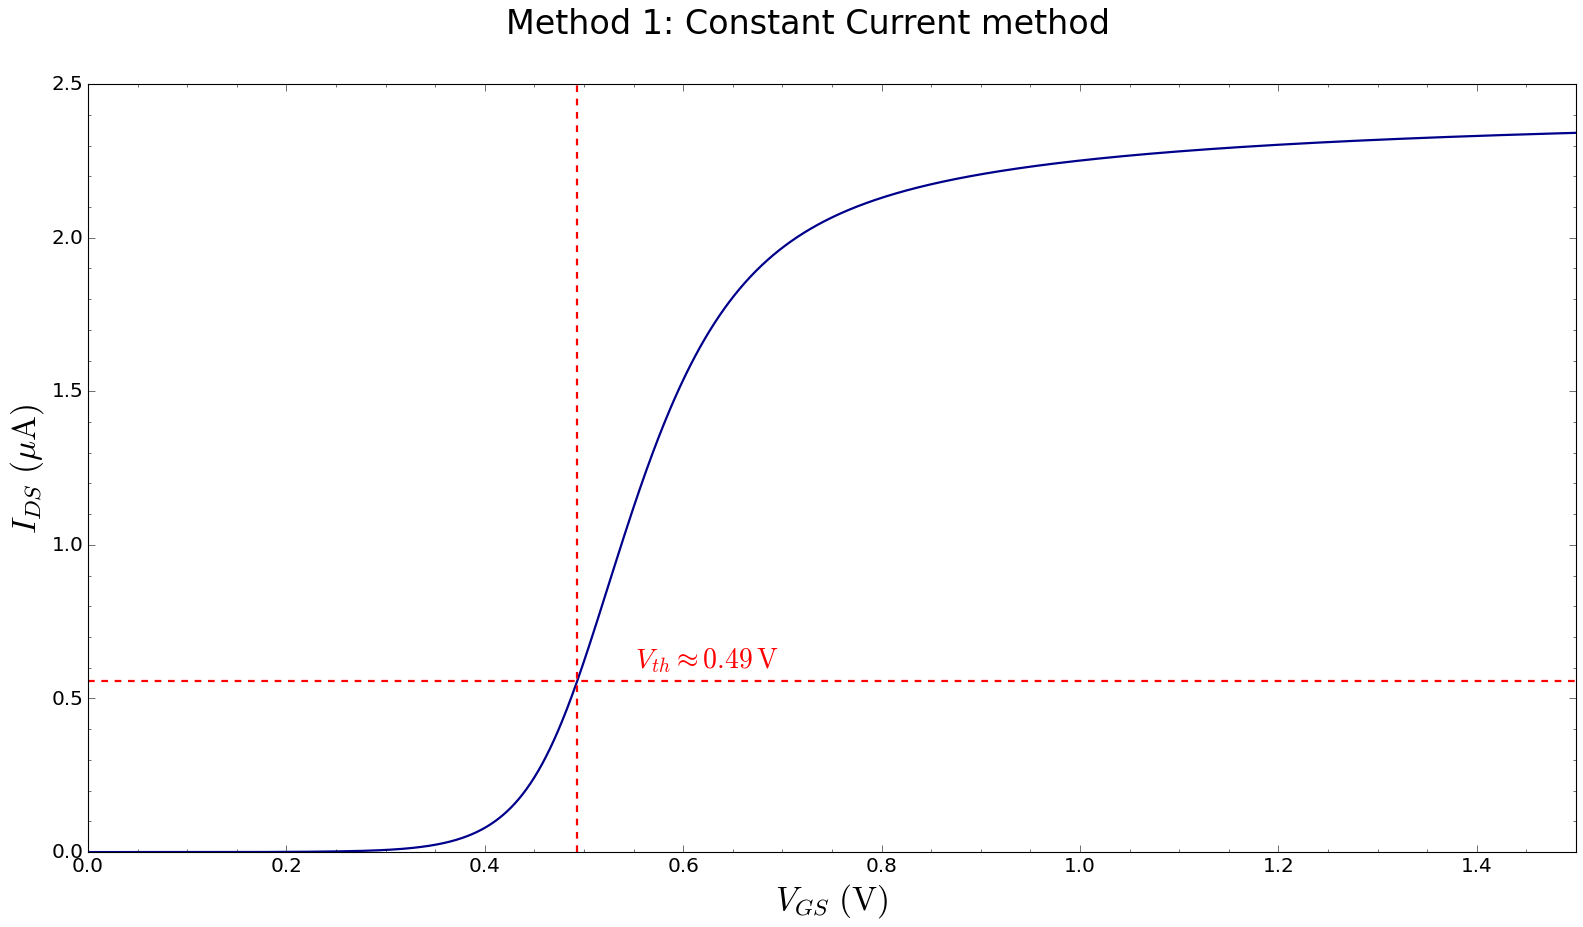

In [108]:
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]
ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 18)
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 1.5)

plt.suptitle("Method 1: Constant Current method", fontsize = 30)
ax.plot(Vg, Ids*1e6, label = '$I_{{\\rm ds}}$', color = 'darkblue', linestyle = 'solid', linewidth = 2.)
ax.set_xlabel('$V_{GS}\ (\\mathrm{V})$', fontsize = 30)
ax.set_ylabel('$I_{DS}\ (\\mathrm{\mu A})$', fontsize = 30)

I_DS_tosearch = 1 / 0.18 * 1e-7
V_threshold = Vg[np.isclose(I_DS_tosearch, Ids, rtol = 1e-20)]

ax.axhline(y = I_DS_tosearch * 1e6, xmin = 0, xmax = 1, linestyle = "dashed", color = "red", linewidth = 2.)
ax.axvline(x = np.mean(V_threshold), ymin = 0, ymax = 1, linestyle = "dashed", color = "red", linewidth = 2.)
ax.text(np.mean(V_threshold) + .05, I_DS_tosearch + 0.6, '$\ V_{th}\\approx %.2f\, \mathrm{V}$' % np.mean(V_threshold), color = 'red', fontsize = 25)

In [43]:
print("The threshold voltage is (approximately): %.3f V" % np.mean(V_threshold))

The threshold voltage is (approximately): 0.493 V


### Method 2: Extrapolation in the Linear Region method

Text(0, 0.5, '$I_{DS}\\ (\\mathrm{\\mu A})$')

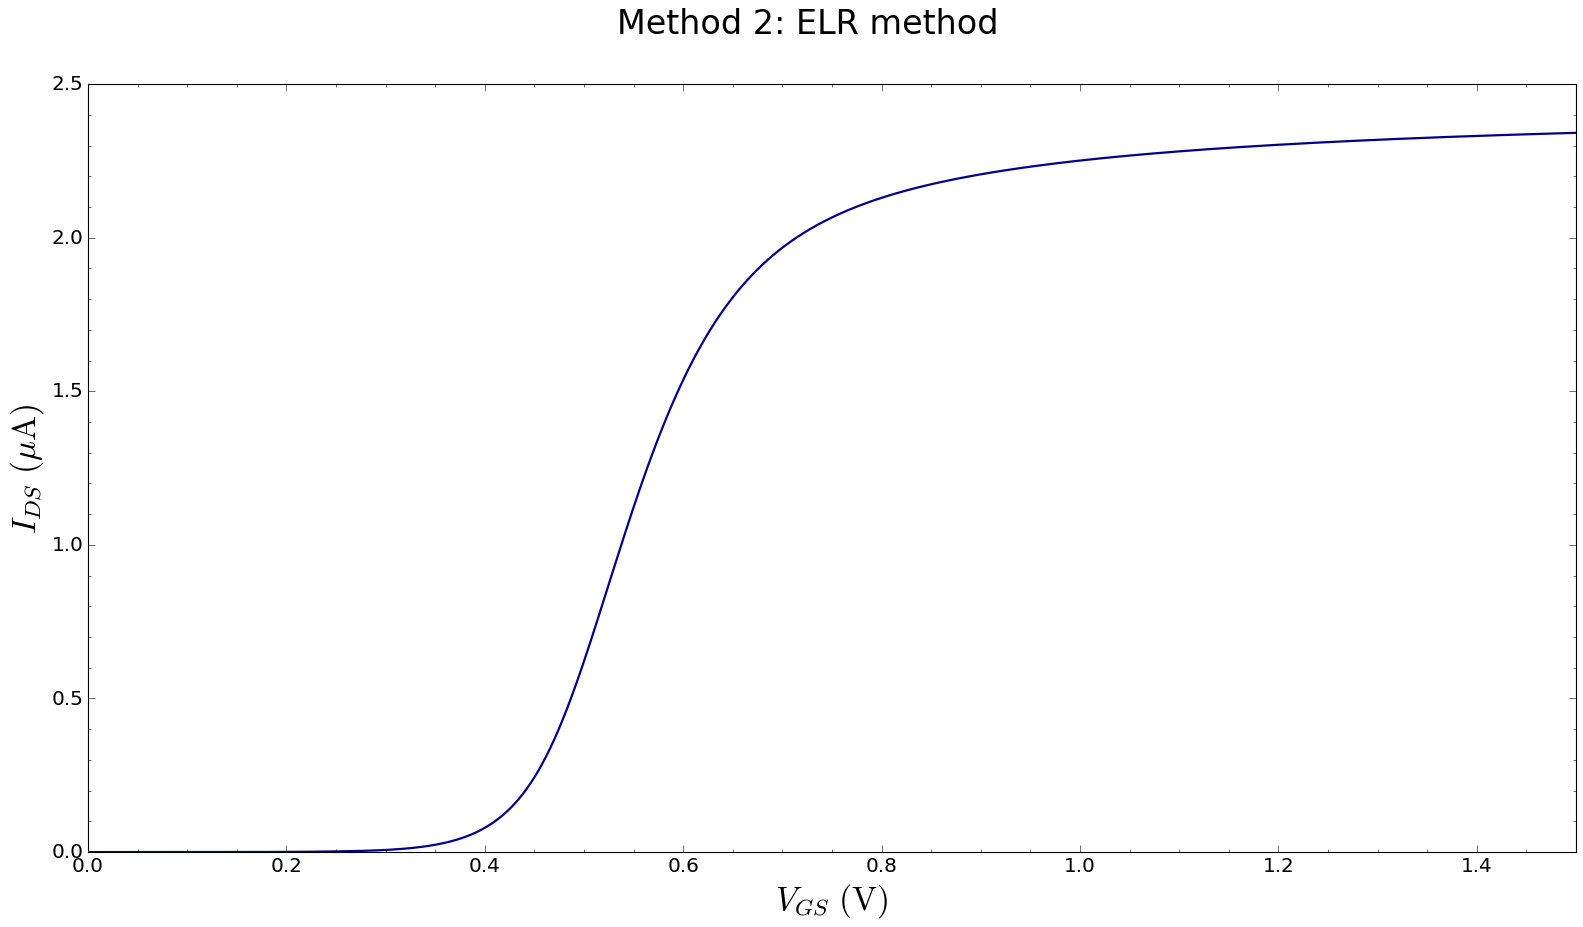

In [109]:
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]
ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 18)
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 1.5)

plt.suptitle("Method 2: ELR method", fontsize = 30)
ax.plot(Vg, Ids*1e6, label = '$I_{{\\rm ds}}$', color = 'darkblue', linestyle = 'solid', linewidth = 2.)
ax.set_xlabel('$V_{GS}\ (\\mathrm{V})$', fontsize = 30)
ax.set_ylabel('$I_{DS}\ (\\mathrm{\mu A})$', fontsize = 30)

Let's find a function to describe this curve

In [70]:
def sigmoid(x, A, x0, gr):
    return A / (1 + np.exp(-(x-x0)/gr))

p0 = [2.3, 0.5, 0.06]
sol = so.curve_fit(sigmoid, Vg, Ids*1e6, p0 = p0)
coef, cov = sol; A, x0, gr = coef; xaux = np.linspace(0, max(Vg), len(Vg)); yaux = sigmoid(xaux, *coef)
print(coef)

[2.34160262 0.56838301 0.06889626]


Text(0.44990393106951726, 0.1, '$\\ V_{th}\\approx 0.44\\, \\mathrm{V}$')

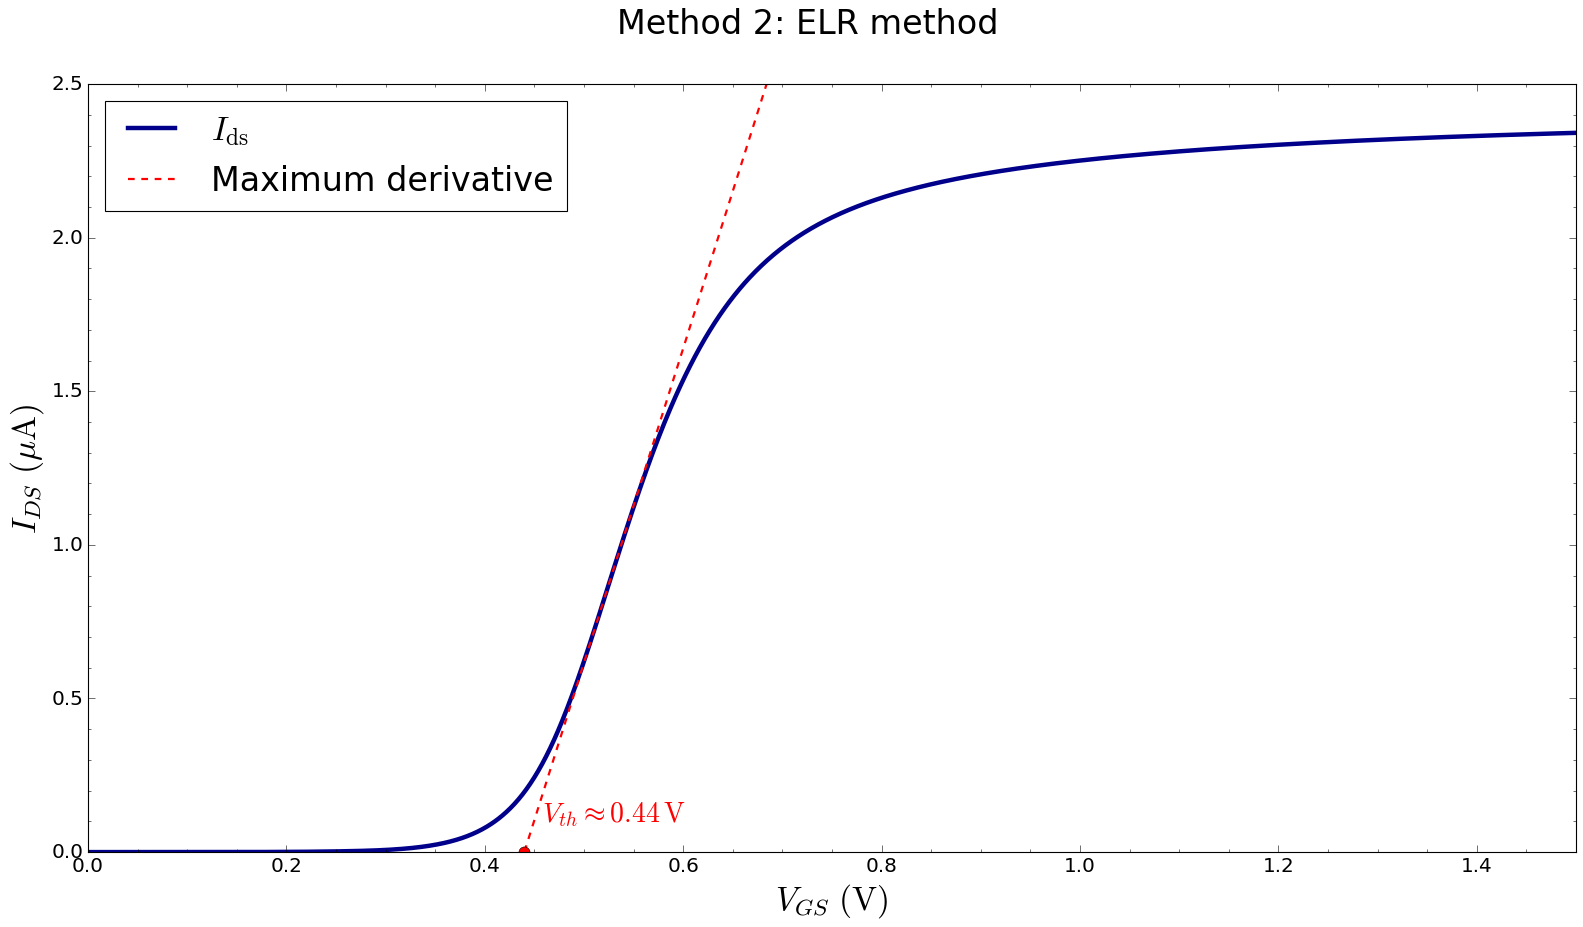

In [129]:
from functools import reduce

fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]
ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 18)
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 1.5)

plt.suptitle("Method 2: ELR method", fontsize = 30)
ax.plot(Vg, Ids*1e6, label = '$I_{{\\rm ds}}$', color = 'darkblue', linestyle = 'solid', linewidth = 4.)
ax.set_xlabel('$V_{GS}\ (\\mathrm{V})$', fontsize = 30)
ax.set_ylabel('$I_{DS}\ (\\mathrm{\mu A})$', fontsize = 30)

# find the maximum derivative
diff = []
for i in range(1, len(Vg)):
    diff.append(Ids[i]-Ids[i-1])
Vg[np.argmax(diff)]
slope = 1e6 * (Ids[np.argmax(diff)] - Ids[np.argmax(diff)-1]) / (Vg[np.argmax(diff)] - Vg[np.argmax(diff)-1])
inter = Ids[np.argmax(diff)]*1e6 - slope * Vg[np.argmax(diff)]
xplot = np.linspace(0, .7, 2)
def lin(x, a, b):
    return a + b*x
yplot = lin(xplot, inter, slope)

ax.plot(xplot, yplot, "r--", linewidth = 2, label = "Maximum derivative")
ax.legend(loc= "best", fontsize = 30)
ax.plot((-inter / slope), 0, "ro", markersize = 10)
ax.text((-inter / slope) + .01, 0.1, '$\ V_{th}\\approx %.2f\, \mathrm{V}$' % (-inter/slope), color = 'red', fontsize = 25)

In [121]:
print("The threshold voltage is (approximately): %.3f V" % (-inter/slope))

The threshold voltage is (approximately): 0.440 V
